<a href="https://colab.research.google.com/github/ychoi-kr/llm-api-prog/blob/main/6_upstage/web_image_ocr_qa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹에서 이미지를 크롤링하고 텍스트를 추출해 질의응답

## 패키지 설치

In [ ]:
!pip install openai

## API 키 준비

In [ ]:
from google.colab import userdata
upstage_api_key = userdata.get('UPSTAGE_API_KEY')
# openai_api_key = userdata.get('OPENAI_API_KEY')

## 이미지 가져오기

Content-Type: image/jpeg


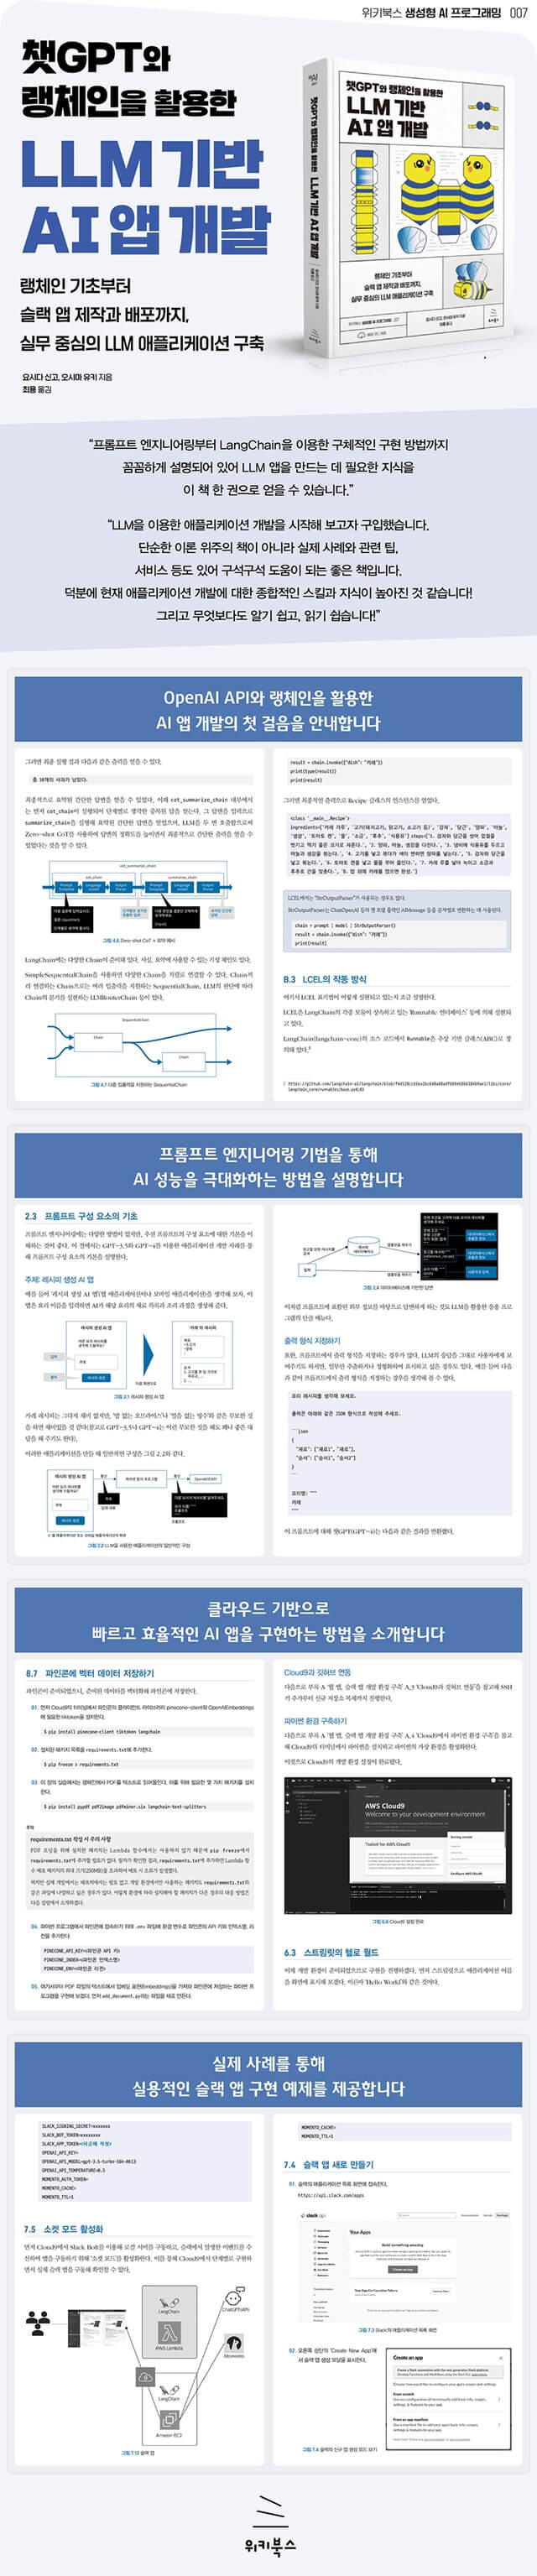

Image saved successfully in /content/llm-apps_Detail.jpg


In [ ]:
import requests
from urllib.parse import urlparse, unquote
from PIL import Image
from io import BytesIO

# 이미지 URL 설정
image_url = "https://ychoi.kr/assets/images/books/llm-apps_Detail.jpg"

# 이미지 다운로드
response = requests.get(image_url)
content_type = response.headers.get('Content-Type')
print(f"Content-Type: {content_type}")

image_path = None

# 이미지 데이터 확인 및 저장
if 'image' in content_type:

    parsed_url = urlparse(image_url)
    filename = unquote(parsed_url.path.split('/')[-1])

    # 이미지 데이터를 BytesIO 객체로 변환
    image_data = BytesIO(response.content)

    # PIL을 사용하여 이미지 객체 생성
    image = Image.open(image_data)

    display(image)

    # 로컬 파일 시스템에 이미지 저장
    image_path = f'/content/{filename}'
    image.save(image_path)

    print(f"Image saved successfully in {image_path}")
else:
    print("The URL does not point to an image. Please check the URL.")


## 이미지에서 텍스트 추출

In [ ]:
image_file = open(image_path, "rb")
url = "https://api.upstage.ai/v1/document-ai/ocr"
headers = {"Authorization": f"Bearer {upstage_api_key}"}
files = {"document": image_file}
response = requests.post(url, headers=headers, files=files)

print(response.json())

{'apiVersion': '1.1', 'confidence': 0.8635, 'metadata': {'pages': [{'height': 3070, 'page': 1, 'width': 640}]}, 'mimeType': 'multipart/form-data', 'modelVersion': 'ocr-2.2.1', 'numBilledPages': 1, 'pages': [{'confidence': 0.8635, 'height': 3070, 'id': 0, 'text': '위키북스 생성형 AI 프로그래밍 007 \n챗GPT와 \n엔 \n챗GPT와 행체인을 활용한 \n랭체인을 활용한 첫GPT와캠페인을활용한 AI 앱 개발 \nLLM 기반 \nLLM 기반 \nLLM기반 \nAI앱 개발 AI앱개발 \n생체인기초부터 \n랭체인 기초부터 BONDOWN 실무 중심의UM 애플리케이션 구축 \n술력 업체적과 배포까지, \n슬랙 앱 제작과 배포까지, 파D1290 \n환자적 해지 \n실무 중심의 LLM 애플리케이션 구축 ♤ BEM \n요시다 신고, 오시마 유키 지음 \n최용 옮김 \n"프롬프트 엔지니어링부터 LangChain을 이용한 구체적인 구현 방법까지 \n꼼꼼하게 설명되어 있어 LLM 앱을 만드는 데 필요한 지식을 \n이 책 한 권으로 얻을 수 있습니다." \n"LLM을 이용한 애플리케이션 개발을 시작해 보고자 구입했습니다. \n단순한 이론 위주의 책이 아니라 실제 사례와 관련 팁, \n서비스 등도 있어 구석구석 도움이 되는 좋은 책입니다. \n덕분에 현재 애플리케이션 개발에 대한 종합적인 스킬과 지식이 높아진 것 같습니다! \n그리고 무엇보다도 알기 쉽고, 읽기 쉽습니다!" \nOpenAI API와 랭체인을 활용한 \nAI 앱 개발의 첫 걸음을 안내합니다 \n그러면 최종 실행 결과 다음과 같은 출력을 얻을 수 있다. result chale,Invske(["dish"i "카페") \nprint(type(result)) \n총 38개의 사과가 남았다. print(result) \n

In [ ]:
recognized_text = response.json()["pages"][0]["text"]
print(recognized_text)

위키북스 생성형 AI 프로그래밍 007 
챗GPT와 
엔 
챗GPT와 행체인을 활용한 
랭체인을 활용한 첫GPT와캠페인을활용한 AI 앱 개발 
LLM 기반 
LLM 기반 
LLM기반 
AI앱 개발 AI앱개발 
생체인기초부터 
랭체인 기초부터 BONDOWN 실무 중심의UM 애플리케이션 구축 
술력 업체적과 배포까지, 
슬랙 앱 제작과 배포까지, 파D1290 
환자적 해지 
실무 중심의 LLM 애플리케이션 구축 ♤ BEM 
요시다 신고, 오시마 유키 지음 
최용 옮김 
"프롬프트 엔지니어링부터 LangChain을 이용한 구체적인 구현 방법까지 
꼼꼼하게 설명되어 있어 LLM 앱을 만드는 데 필요한 지식을 
이 책 한 권으로 얻을 수 있습니다." 
"LLM을 이용한 애플리케이션 개발을 시작해 보고자 구입했습니다. 
단순한 이론 위주의 책이 아니라 실제 사례와 관련 팁, 
서비스 등도 있어 구석구석 도움이 되는 좋은 책입니다. 
덕분에 현재 애플리케이션 개발에 대한 종합적인 스킬과 지식이 높아진 것 같습니다! 
그리고 무엇보다도 알기 쉽고, 읽기 쉽습니다!" 
OpenAI API와 랭체인을 활용한 
AI 앱 개발의 첫 걸음을 안내합니다 
그러면 최종 실행 결과 다음과 같은 출력을 얻을 수 있다. result chale,Invske(["dish"i "카페") 
print(type(result)) 
총 38개의 사과가 남았다. print(result) 
최종적으로 요약된 간단한 답변을 얻을 수 있었다. 이때 cot_summarize_chain 내부에서 그러면 최종적인 출력으로 Recipe 클래스의 인스턴스를 얻었다. 
는 먼저 cot_chain이 실행되어 단계별로 생각한 중복된 답을 얻는다. 그 답변을 입력으로 
eclass '_main_Arcipe') 
sunnarize.chain을 실행해 요약된 간단한 답변을 한있으며, LLM을 투 번 호증함으로써 '마늘', 
Ingretients-['카레 가루', '고기(돼지고기, 닭고기, 소고기 61', '갑재', '당근', '알

## 질의응답

In [ ]:
from openai import OpenAI

In [ ]:
# Solar
client = OpenAI(
    api_key=upstage_api_key,
    base_url="https://api.upstage.ai/v1/solar"
)
model = "solar-mini"

In [ ]:
# OpenAI
# client = OpenAI(api_key=openai_api_key)
# model = "gpt-4o-mini"

In [ ]:
chat_response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "다음은 이미지 OCR 결과입니다.\n\n" + recognized_text},
        {"role": "user", "content": "이 책의 특징이 무엇인가요?"}
    ]
)

In [ ]:
print(chat_response.choices[0].message.content)

이 책은 챗GPT와 LLM(Large Language Model)을 활용하여 AI 앱을 개발하는 방법을 소개합니다. LLM을 활용한 앱 개발에 대한 기초와 실무적인 내용을 다루며, 사용자들이 쉽게 이해하고 활용할 수 있도록 구성되었습니다. 또한, 이 책은 실제 사례를 통해 프롬프트 엔지니어링 기법과 클라우드 기반의 AI 앱을 구현하는 방법을 설명합니다.
